<a href="https://colab.research.google.com/github/syedhammadahmed/quantumcomputings20/blob/master/hw_2/hw_2_problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2 ##

### Problem 1 ###

Implement a simulation of the Hadamard test for any qubit state |psi> and any single qubit unitary U using numpy. Observe that you have to compute how the state of the quantum register changes. It is not enough to just code up the formula for the probabilities that we derived in class.

Recall that you can realize the controlled-U gate as follows: |0><0| otimes I + |1><1| otimes U. Use the numpy command np.kron for the tensor product.

For |psi> use the state |0> and for the unitary U use the orthogonal matrix that describes the rotation by angle 2 pi theta, where theta [0, 1).

Create a plot showing the probability Pr(0) in dependence on theta.


psi:
 [[0.70710678]
 [0.70710678]]
bra(psi):
 [[0.70710678 0.70710678]]
temp:  [[1.]]
norm:  [1.]
temp:  [[0.99901336]]
norm:  [0.99901336]
temp:  [[0.99605735]]
norm:  [0.99605735]
temp:  [[0.99114363]]
norm:  [0.99114363]
temp:  [[0.98429158]]
norm:  [0.98429158]
temp:  [[0.97552826]]
norm:  [0.97552826]
temp:  [[0.96488824]]
norm:  [0.96488824]
temp:  [[0.95241353]]
norm:  [0.95241353]
temp:  [[0.93815334]]
norm:  [0.93815334]
temp:  [[0.92216396]]
norm:  [0.92216396]
temp:  [[0.9045085]]
norm:  [0.9045085]
temp:  [[0.88525662]]
norm:  [0.88525662]
temp:  [[0.86448431]]
norm:  [0.86448431]
temp:  [[0.84227355]]
norm:  [0.84227355]
temp:  [[0.81871199]]
norm:  [0.81871199]
temp:  [[0.79389263]]
norm:  [0.79389263]
temp:  [[0.7679134]]
norm:  [0.7679134]
temp:  [[0.74087684]]
norm:  [0.74087684]
temp:  [[0.71288965]]
norm:  [0.71288965]
temp:  [[0.68406228]]
norm:  [0.68406228]
temp:  [[0.6545085]]
norm:  [0.6545085]
temp:  [[0.62434494]]
norm:  [0.62434494]
temp:  [[0.59369066]]
norm

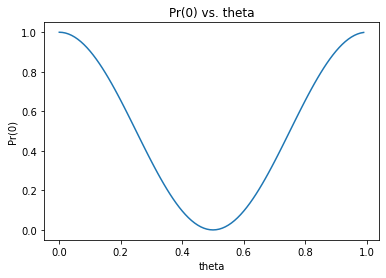

In [93]:
import math
import matplotlib.pyplot as plt 
import numpy as np
import numpy.linalg as NPLA
import scipy.linalg as SPLA

#references: 
#[1] 

#  |0>    --- H --- * --- H --- M 
#                   |
#  |psi>  ---/----- U -----------

# finds tensor product of 2 matrices
def tensor(m1, m2):
  return np.kron(m1, m2)

# generates a ket taking # of qubits and the ket value as arguments
def getKet(qubits, value):
  n = 2**qubits
  vec = np.zeros(n)
  if value>=2**qubits :
    print("getKet({}, {}): Value {} cannot be represented in {} qubits!".format(value, qubits, value, qubits))
    return
  vec[value] = 1
  vec = np.reshape(vec, (n, 1))
  return vec

#initializes the state psi taking the 1D array of coefficients/prob. amplitudes as argument
def initPsi(coeffs):
  n = np.size(coeffs)
  psi = np.reshape(coeffs, (n, 1))
  return psi

#initializes the 1 qubit unitary matrix - rotation of 2-pi-theta where theta is the argument
def getUnitary(theta):
  # unitary = np.array([[math.cos(2*math.pi*theta), -1 * math.sin(2*math.pi*theta)],
  #                     [math.sin(2*math.pi*theta),      math.cos(2*math.pi*theta)]])
  unitary = np.array([[round(math.cos(2*math.pi*theta),10), round(-1 * math.sin(2*math.pi*theta), 10)],
                      [math.sin(2*math.pi*theta),      round(math.cos(2*math.pi*theta), 10)]])
  return unitary

def bra(ket):
  (n, c) = np.shape(ket)
  bra = np.reshape(ket, (c, n))
  return bra

def plot(thetaX, probabilityY):  
    
  # plotting the points  
  plt.plot(thetaX, probabilityY) 
    
  # naming the x axis 
  plt.xlabel('theta') 
  # naming the y axis 
  plt.ylabel('Pr(0)') 
    
  # giving a title to my graph 
  plt.title('Pr(0) vs. theta') 
    
  # function to show the plot 
  plt.show() 

def simulateHadamardTest(psi, unitary):
  ket0 = getKet(1, 0)
  ket1 = getKet(1, 1)

  # print("applying first Hadamard:")
  phi = tensor((1/math.sqrt(2)*(ket0 + ket1)), psi)
  # print(phi)

  # print("applying controlled Unitary:")
  phi = tensor(((1/math.sqrt(2))*ket0), psi) + tensor(((1/math.sqrt(2))*ket1), np.matmul(unitary, psi)) 
  # print(phi)

  # print("applying second Hadamard:")
  term1 = tensor(0.5 * ket0, psi + np.matmul(unitary, psi)) # for Pr(0)
  term2 = tensor(0.5 * ket1, psi - np.matmul(unitary, psi)) # for Pr(1)
  phi = term1 + term2
  # print(phi)

  # print("measurement:")
  probabilityBit = 0 # finding P(0) - set to 1 to find P(1)
  probability = (1 - probabilityBit) * term1 + probabilityBit * term2 
  norm = (probability)**2
  # print(norm)

  # temp = np.matmul(bra(psi) + np.matmul(bra(psi), np.transpose(unitary)), psi + np.matmul(unitary, psi))/4
  # print("temp: ", temp)
  # print("norm: ", norm[probabilityBit*2] + norm[probabilityBit*2+1])

  return norm[probabilityBit*2] + norm[probabilityBit*2+1]


#test driver code
def main():
  psi = initPsi([1/math.sqrt(2), 1/math.sqrt(2)])
  print("psi:\n" , psi)
  print("bra(psi):\n" , bra(psi))
  # print("U:\n", unitary)
  thetaX = np.zeros(100) 
  probabilityY = np.zeros(100)

  for i in range(0, 100):
    theta = i/100.0
    unitary = getUnitary(theta)
    thetaX[i] = theta
    probabilityY[i] = simulateHadamardTest(psi, unitary)
  
  plot(thetaX, probabilityY)


  # n = 2
  # k = 3
  # m = np.array([[1, 1],
  #               [-1, 1]])
  # m = np.reshape(m, (n, n))
  # coeffs = annihilate_poly(m, k)
  # print("Null Space:")
  # print(coeffs)

if __name__ == "__main__":
    main()



### Problem 2 ###

Implement a simulation of the SWAP test.

Use |psi1> = |0> and |psi2> = cos(2 pi theta) |0> + sin(2 pi theta) |1>. 

Create a plot showing the probability Pr(0) in dependence on theta.